## CIFAR10
32x32 픽셀의 60000개 컬러 이미지로 구성된 데이터로 10개 클래스로 라벨링 되어 있다.    
MNIST와 같이 머신러닝 연구에 가장 널리 사용되는 dataset중 하나이다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

import torchvision
import torchvision.transforms as transforms

## 1. Define Hyper-parameters and pre-set device on cuda

In [2]:
# Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_classes = 10  # 다중 분류에서 클래스가 10개 있으므로
in_channel = 3    # 흑백이 아닌 컬러 이미지이기 때문에 RGB에 해당하는 3 channel

# Hyper-Parameter
num_epochs = 20
batch_size = 64
max_pool_kernel = 2
learning_rate = 0.001

## 2. Load Data

In [3]:
# 이미지 정규화
transform = transforms.Compose([transforms.ToTensor(), # 우선 텐서로 바꿔주고
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # RGB 이미지의 각 채널에 대해 평균이 0.5, 표준편차가 0.5로 정규화를 수행

In [4]:
train_data = torchvision.datasets.CIFAR10(root='./datasets',
                                          train=True,
                                          transform = transform,
                                          download=True)
test_data = torchvision.datasets.CIFAR10(root='./datasets',
                                         train=False,
                                         transform = transform)

Files already downloaded and verified


In [5]:
''' Normalize(정규화)를 하지 않은 경우
train_data = torchvision.datasets.CIFAR10(root='./datasets',
                                          train=True,
                                          transform = transforms.ToTensor(),
                                          download=True)
test_data = torchvision.datasets.CIFAR10(root='./datasets',
                                         train=False,
                                         transform = transforms.ToTensor())
'''

" Normalize(정규화)를 하지 않은 경우\ntrain_data = torchvision.datasets.CIFAR10(root='./datasets',\n                                          train=True,\n                                          transform = transforms.ToTensor(),\n                                          download=True)\ntest_data = torchvision.datasets.CIFAR10(root='./datasets',\n                                         train=False,\n                                         transform = transforms.ToTensor())\n"

## 3. Check Image

In [6]:
test_data[0][0].shape

torch.Size([3, 32, 32])

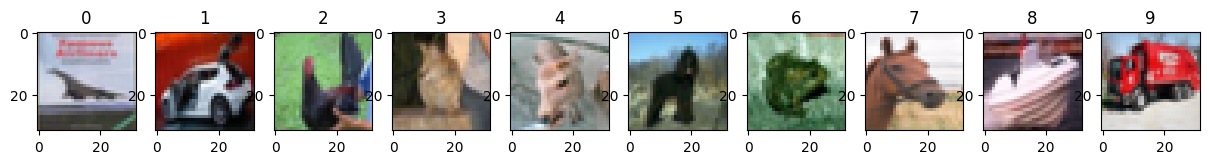

In [7]:
plt.figure(figsize=(15,10))
target = 0
for i in range(200):
  image = test_data[i][0]
  label = test_data[i][1]
  if target == 10: break
  if label == target:
    image = torchvision.utils.make_grid(image)
    image = image / 2 + 0.5     # unnormalize
    npimg = image.numpy()

    plt.subplot(1, 10, target+1)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(label)
    target += 1

plt.show()

#classes = 'plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'

In [8]:
''' # Normalize(정규화)를 하지 않은 경우
plt.figure(figsize=(15,10))
target = 0
for i in range(200):
  image = test_data[i][0]
  label = test_data[i][1]
  if target == 10: break
  if label == target:

    plt.subplot(1, 10, target+1)
    plt.imshow(image.permute(1, 2, 0))
    plt.title(label)
    target += 1

plt.show()
'''

' # Normalize(정규화)를 하지 않은 경우\nplt.figure(figsize=(15,10))\ntarget = 0\nfor i in range(200):\n  image = test_data[i][0]\n  label = test_data[i][1]\n  if target == 10: break\n  if label == target:\n    \n    plt.subplot(1, 10, target+1)\n    plt.imshow(image.permute(1, 2, 0))\n    plt.title(label)\n    target += 1\n  \nplt.show()  \n'

## 4. Load DataLoader

In [9]:
train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                           batch_size = batch_size,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_data,
                                          batch_size = batch_size,
                                          shuffle = False)

In [10]:
# check how data loader works
print(len(test_loader)) # 10000 / 64(batch_size) = 156.25이므로 test_loader는 총 157번 batch를 꺼낸다

for idx, (images, labels) in enumerate(test_loader): # test_loader에서 하나의 batch를 꺼내서 image와 label로 나눈다
  if idx == 3: # 0~2까지 3개를 출력하고 멈추게
    break
  print(image.size(), len(images), labels)
  # image.size() :  이미지는 3x32x32로 되어있고
  # len(images) :   image의 개수는 매번 시행마다 batch_size만큼 꺼내오기 때문에 미리 설정한 batch_size이고
  # labels :        매 시행마다 batch_size만큼에 대한 라벨(클래스)가 나온다

157
torch.Size([3, 32, 32]) 64 tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
        5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9,
        7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3])
torch.Size([3, 32, 32]) 64 tensor([6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7,
        8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0,
        6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3])
torch.Size([3, 32, 32]) 64 tensor([5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9,
        6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9,
        3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8])


## 5. Define Model

In [11]:
class Conv(nn.Module):
  def __init__(self, num_classes):
    super(Conv, self).__init__() # nn.Module을 상속받고

    self.layer1 = nn.Sequential( # 32x32x3 --> 32x32x16
        nn.Conv2d(in_channels=in_channel, out_channels=16, kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(max_pool_kernel) # 32x32x16 --> 16x16x16
    )
    self.layer2 = nn.Sequential( # 16x16x16 --> 16x16x32
        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(max_pool_kernel) # 16x16x32 --> 8x8x32
    )
    self.layer3 = nn.Sequential( # 8x8x32 --> # 8x8x64
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(max_pool_kernel) # 8x8x64 --> 4x4x64
    )
    self.fc = nn.Linear(4*4*64, num_classes)

  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)

    x = x.reshape(x.size(0), -1) # fully connected layer에 맞게 batch_size(x.size(0))와 1차원으로 flatten
    x = self.fc(x)
    return x

In [12]:
model = Conv(num_classes)
print(model)

Conv(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1024, out_features=10, bias=True)
)


## 6. Criterion & Optimizer

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

## 7. Train

In [14]:
total_loss = [] # loss를 저장하기 위한 리스트

for epoch in range(num_epochs): # 매 학습 횟수마다
  epoch_loss = []
  for idx, (images, labels) in enumerate(train_loader): # 매번 batch_size마다
    images = images.to(device)
    labels = labels.to(device)

    # Forward
    outputs = model(images)

    optimizer.zero_grad()
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    epoch_loss.append(loss.detach().cpu().numpy())

  print("Epoch [{}/{}], Loss : {:.4f}".format(epoch+1, num_epochs, loss))
  total_loss.append(np.mean(epoch_loss))

torch.save(model.state_dict(), 'model.pth') # 학습이 끝나고 나면 모델을 pth 파일로 저장

Epoch [1/20], Loss : 0.9881
Epoch [2/20], Loss : 0.7911
Epoch [3/20], Loss : 0.8555
Epoch [4/20], Loss : 0.3701
Epoch [5/20], Loss : 1.0318
Epoch [6/20], Loss : 0.8121
Epoch [7/20], Loss : 0.4402
Epoch [8/20], Loss : 0.2990
Epoch [9/20], Loss : 0.4722
Epoch [10/20], Loss : 0.4145
Epoch [11/20], Loss : 0.2398
Epoch [12/20], Loss : 0.5190
Epoch [13/20], Loss : 0.5234
Epoch [14/20], Loss : 0.1100
Epoch [15/20], Loss : 0.2822
Epoch [16/20], Loss : 0.0589
Epoch [17/20], Loss : 0.2089
Epoch [18/20], Loss : 0.4706
Epoch [19/20], Loss : 0.2048
Epoch [20/20], Loss : 0.3538


## 8. Visualization

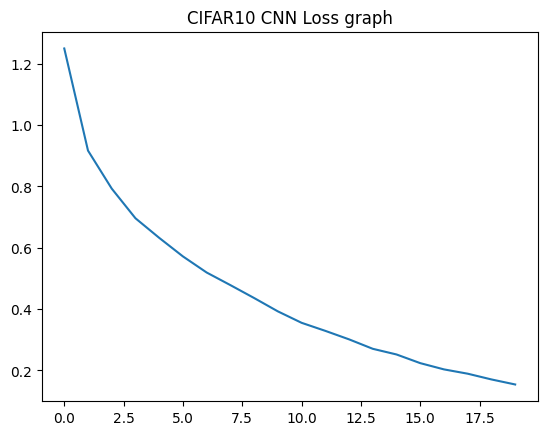

In [15]:
plt.plot(total_loss)
plt.title("CIFAR10 CNN Loss graph")
plt.show()

## 9. Test & Accuracy

In [16]:
model.eval() # Set model as evaluation mode

with torch.no_grad(): # auto_grad off
  correct = 0
  total = 0
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  print('Accuracy of the network on the {} test images {}%'.format(len(test_loader)*batch_size, 100*correct/total))

Accuracy of the network on the 10048 test images 73.88%
